# Colores en python 🌈

Una parte de mí tiene un mini TOC que ama ver los colores ordenados 💕 y se me ocurrió que ya debe existir una forma pythonesca de hacerlo 🐍. Luego de investigar un rato encontré que la respuesta siempre estuvo en el viej y confiable machine learning


En palabras simples, solo se le aplica un Kmeans a una imagen y eso entregará el resultado de los colores más representativos de esta, armando así la paleta de colores de la imagen

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import colorsys

## Paso 1: leer la imagen

Para esto se utiliza **opencv** para leer la imagen y **matplotlib** para visualizarla

In [2]:
def plot_single_image(img):
    plt.figure(figsize=(10,5),dpi=100)
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    
def load_image(name,plot=True):
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    if plot:
        plot_single_image(img)
    return img

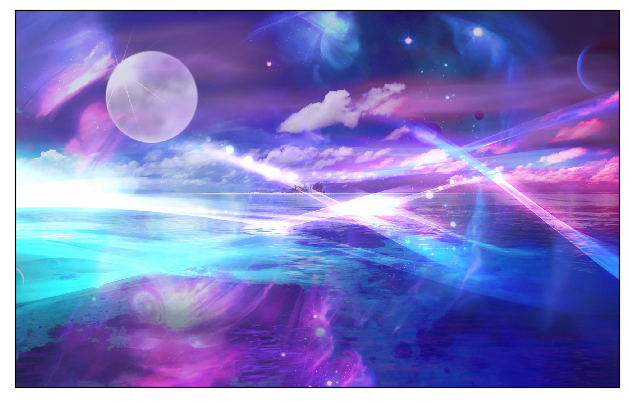

In [3]:
img=load_image('./images/273187.jpg')

## Paso 2: El cluster

In [7]:
def get_k_colors(img,k,plot=True):
    Z = img.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    ret,label,center=cv2.kmeans(Z,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()].reshape((img.shape))
    if plot:
        plot_single_image(res)
    
    return center,res

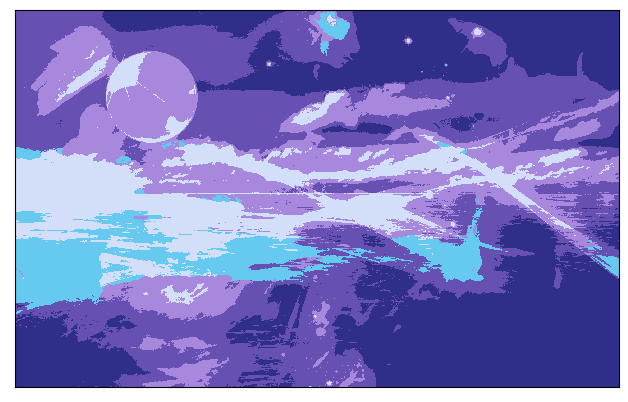

In [10]:
center,_= get_k_colors(img,5)

## Paso 3: Ver los resultados

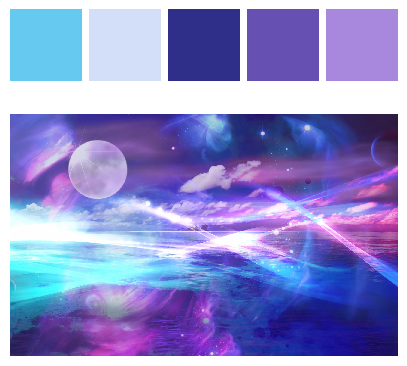

In [12]:
def plot_result(center,img):
    fig3 = plt.figure(constrained_layout=False,figsize=(5,5),dpi=100)
    gs = fig3.add_gridspec(2,len(center),wspace=0.1,hspace=0.01,height_ratios=[1, 4])

    color3=center.tolist()
    color3.sort(key=lambda rgb: colorsys.rgb_to_hls(*rgb))
    i=0
    for color in (color3):
        color_result = np.full((10, 10, 3), color, dtype=np.uint8)
        ax = fig3.add_subplot(gs[0,i])
        i=i+1
        ax.imshow(color_result)
        ax.set_axis_off()
        
    ax=fig3.add_subplot(gs[1,:])
    ax.imshow(img)
    ax.set_axis_off()
    
plot_result(center,img)

## Paso 4: Juntar todo en una sola función 💕

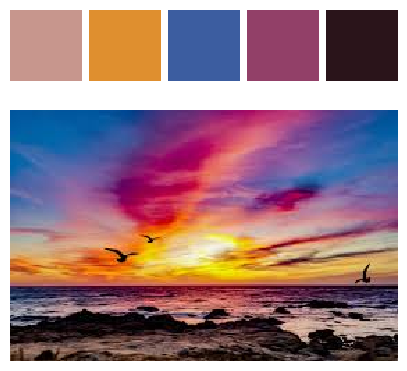

In [16]:
def make_magic(path,n_colors=5):
    img= load_image(path,plot=False)
    center,_ =get_k_colors(img,n_colors,plot=False)
    plot_result(center,img)
    
make_magic('./images/2.jpeg')

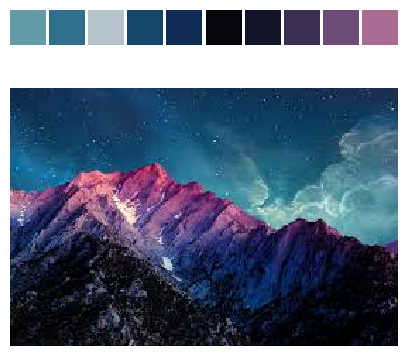

In [17]:
make_magic('./images/3.jpeg',n_colors=10)